In [1]:
from pprint import pprint
from lxml import html
import requests


<h2>Dzen</h2>

In [2]:
#culture news
url = 'https://dzen.ru/news/rubric/culture'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36',
}

#что это значит? без этого параметра возвращал скрипт
params = {
    'sso_failed': '',
}

response = requests.get(url, headers=headers, params=params)

In [3]:
response.url

'https://dzen.ru/news/rubric/culture?issue_tld=ru&sso_failed='

'<!DOCTYPE html><html lang="ru" class="Theme Theme_color_news-light Theme_root_news-light"><head><script nonce="c1be272efb639">window.Ya=window.Ya||{};window.Ya.Neo=window.Ya.Neo||{};window.Ya.Neo={"reqid":"1671703294206716-18309290355413294918-x33e76jqtond3sql-BAL-1260-NEWS-NEWS_RUBRIC","flags":{"yxneo_adv-off":0,"yxneo_intersection-observer-margin":"100%","tabs_order_version":"search,images,video,maps,market,news,translate,collections,q,uslugi:music,disk,mail,all","yxneo_css-injection":".mg-story__comments{display:none}","yxneo_referrer-policy":"no-referrer-when-downgrade","yxneo_butterfly-version":"v0.134.0","yxneo_comments-env":"production","yxneo_vh-player-version":"0xd2e49fd","yxneo_lazy-load-vh-player":"1","yxneo_heart-beat-time-multiplier":1.2,"yxneo_data-consent":1,"yxneo_adv_myTarget-chunk-enabled":1,"yxneo_bulk-log":1,"yxneo_disable-comments":1,"yxneo_my-target-default-adv-config":1,"yxneo_fav-modal-description":"Выбирайте интересные вам СМИ, чтобы видеть все события дня чер
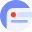

In [4]:
response.text

In [5]:
root = html.fromstring(response.text)
root

<Element html at 0x24b81ecfc20>

In [6]:
culture_all_news = root.xpath("//div/div/div/div[@class='mg-grid__col mg-grid__col_xs_12 mg-grid__col_sm_true']")
culture_all_news

[<Element div at 0x24b81ecfa90>]

In [7]:
dzen_news_culture = []
top_news = culture_all_news[0].xpath("./div[@class='mg-grid__row mg-grid__row_gap_8 news-top-flexible-stories news-app__top']/div/div")
section_news = culture_all_news[0].xpath("./section[@class='news-feed news-app__feed']/div/div/div")

#//div/div/div/div[@class='mg-grid__col mg-grid__col_xs_12 mg-grid__col_sm_true']/section[@class='news-feed news-app__feed']/div/div/div/div/h2/a

for top_new in top_news:
    if top_new.xpath("./div/h2/a/text()"):
        text = top_new.xpath("./div/h2/a/text()")[0]
        link = top_new.xpath("./div/h2/a/@href")[0]
        source = top_new.xpath("./div/div/div/div/span/a/text()")[0]
        date_time = top_new.xpath("./div/div/div/div/span/text()")[0]
    else:
        text = top_new.xpath("./div/div/h2/a/text()")[0]
        link = top_new.xpath("./div/div/h2/a/@href")[0]
        source = top_new.xpath("./div/div/div/span/a/text()")[0]
        date_time = top_new.xpath("./div/div/div/span/text()")[0] #top_new.xpath("./div/div/div/div/span/text()")[0]

        
    dzen_news_culture.append({
        'text': text,
        'link': link,
        'source': source,
        'date_time': date_time,   
    })

for section_new in section_news:
    if section_new.xpath("./div/h2/a/text()"):
        text = section_new.xpath("./div/h2/a/text()")[0]
        link = section_new.xpath("./div/h2/a/@href")[0]
        source = section_new.xpath("./div/div/div/div/span/a/text()")[0] 
        date_time = section_new.xpath("./div/div/div/div/span/text()")[0]
    
    elif section_new.xpath("./div/div/h2/a/text()"):
        text = section_new.xpath("./div/div/h2/a/text()")[0]
        link = section_new.xpath("./div/div/h2/a/@href")[0]
        source = section_new.xpath("./div/div/div/span/a/text()")[0]
        date_time = section_new.xpath("./div/div/div/span/text()")[0]

    else:
        #реклама нужно выпилить ее
        text = ''
        link = ''
        source = ''
        date_time = ''
        
    dzen_news_culture.append({
        'text': text,
        'link': link,
        'source': source,
        'date_time': date_time,   
    })    
    
# dzen_news_culture

In [8]:
for i, new in enumerate(dzen_news_culture):
    print(f"новость {i+1}:")
    for k, v in new.items():
        print(f"\t{k}: {v}")
    print()

новость 1:
	text: Бекмамбетов продал киностудию Bazelevs генпродюсеру Рустамовой и гендиректору Асадову
	link: https://dzen.ru/news/story/Bekmambetov_prodal_kinostudiyu_Bazelevs_genprodyuseru_Rustamovoj_i_gendirektoru_Asadovu--12e81029ebf722df1be96387d11c5ee5?lang=ru&rubric=culture&fan=1&stid=E-8tee44KL-iul-kLM6v&t=1671702660&tt=true&persistent_id=1029762837&story=98a96c21-3f61-521e-9c40-8381ae02147d&issue_tld=ru
	source: РИА Новости
	date_time: 12:44

новость 2:
	text: В России снимут свою версию турецкого сериала «Постучись в мою дверь»
	link: https://dzen.ru/news/story/VRossii_snimut_svoyu_versiyu_tureckogo_seriala_Postuchis_vmoyu_dver--64fc4d3cccb37e4ff8506f6ed1cfd5ed?lang=ru&rubric=culture&fan=1&stid=4IrYWLzFtS8-A99DaviP&t=1671702660&persistent_id=1034160781&story=4925091d-139e-50b7-a76c-e1a402fdd08a&issue_tld=ru
	source: Культуромания
	date_time: 12:43

новость 3:
	text: В США представили шорт-лист претендентов на «Оскар» в 10 категориях
	link: https://dzen.ru/news/story/VSSHA_pr

<h2>Lenta</h2>

In [9]:
url2 = 'https://lenta.ru/rubrics/culture'
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36',
    'issue_tld': 'ru'
}

response = requests.get(url2, headers=headers)

In [10]:
response.text

'<!DOCTYPE html><html lang="ru"><head><title>Новости культуры - Lenta.ru</title><meta charset="utf-8" /><meta content="#292929" name="theme-color" /><link href="https://m.lenta.ru/rubrics/culture/" media="only screen and (max-width: 640px)" rel="alternate" /><link href="https://lenta.ru/rss/google-newsstand/main/" rel="alternate" type="application/rss+xml" /><link href="https://lenta.ru/rubrics/culture/" rel="canonical" /><link href="/manifest.json" rel="manifest" /><link rel="shortcut icon" type="image/x-icon" href="https://icdn.lenta.ru/favicon.ico" /><link rel="apple-touch-icon" type="image/x-icon" href="https://icdn.lenta.ru/images/icons/icon-256x256.png" size="256x256" /><link rel="apple-touch-icon" type="image/x-icon" href="https://icdn.lenta.ru/images/icons/icon-192x192.png" size="192x192" /><link rel="apple-touch-icon" type="image/x-icon" href="https://icdn.lenta.ru/images/icons/icon-152x152.png" size="152x152" /><link rel="apple-touch-icon" type="image/x-icon" href="https://ic

In [11]:
root = html.fromstring(response.text)
root

<Element html at 0x24b81efe450>

In [12]:
sections_path = "//div[@class='layout js-layout']/div[@class='layout__container']/main/div/section/div[@class='rubric-page__container']"

In [13]:
sections = root.xpath(sections_path)
sections

[<Element div at 0x24b82ef9630>, <Element div at 0x24b81ecf3b0>]

In [14]:
culture_news = []

In [15]:
for section in sections:
    for new in section.xpath('./div/div/a'):
        new_url = new.xpath('./@href')[0]
        new_text = str(new.xpath(u'./div/span/text()')[0])
        new_date = new.xpath(u'./div/div/time/text()')
        
        if new.xpath(u'./div/div/time/text()'):
            new_date = new.xpath(u'./div/div/time/text()')
        else:
            new_date = new.xpath(u'./div/time/text()')
            
        culture_news.append({
            'text': new_text,
            'url': 'https://lenta.ru' + new_url,
            'date_time': new_date[0]
        })


In [16]:
for i, new in enumerate(culture_news):
    print(f"новость {i+1}:")
    for k, v in new.items():
        print(f"\t{k}: {v}")
    

новость 1:
	text:  Выходит второй сезон полюбившихся россиянам «Вампиров средней полосы». Почему это провал?
	url: https://lenta.ru/articles/2022/12/22/vampires/
	date_time: 00:01
новость 2:
	text:  Режиссер «Выжившего» снял трехчасовой фильм о родине и своем кризисе среднего возраста. Что с ним не так?
	url: https://lenta.ru/articles/2022/12/20/bardo/
	date_time: 00:01, 20 декабря 2022
новость 3:
	text: Россияне назвали лучших певцов 2022 года
	url: https://lenta.ru/news/2022/12/22/pevci/
	date_time: 12:38
новость 4:
	text: Адаптацию сериала «Постучись в мою дверь» снимут в России
	url: https://lenta.ru/news/2022/12/22/knock_rus/
	date_time: 12:21
новость 5:
	text: Стивен Спилберг назвал любимый фильм Скорсезе
	url: https://lenta.ru/news/2022/12/22/spilbergscorcese/
	date_time: 12:17
новость 6:
	text: Меган Фокс и Микеле Морроне снимутся в научно-фантастическом триллере
	url: https://lenta.ru/news/2022/12/22/fox_film/
	date_time: 11:07
новость 7:
	text: Умерла актриса сериала «Сабрина